In [1]:
import numpy as np
import pandas as pd
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import random
np.random.seed(1234)
random.seed(1234)

In [3]:
df = pd.read_csv("heart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
print(df['Sex'].value_counts())
# male:0, female:1
df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1})

M    725
F    193
Name: Sex, dtype: int64


In [5]:
print(df['ChestPainType'].value_counts())
# ASY:0, NAP:1, ATA:2, TA:3
df['ChestPainType'] = df['ChestPainType'].replace({'ASY':0,'NAP':1,'ATA':2,'TA':3})

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


In [6]:
print(df['RestingECG'].value_counts())
# Normal:0, LVH:1, ST:2
df['RestingECG'] = df['RestingECG'].replace({'Normal':0,'LVH':1,'ST':2})

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


In [7]:
print(df['ExerciseAngina'].value_counts())
# N:0, Y:1
df['ExerciseAngina'] = df['ExerciseAngina'].replace({'N':0,'Y':1})

N    547
Y    371
Name: ExerciseAngina, dtype: int64


In [8]:
print(df['ST_Slope'].value_counts())
# Flat:0, Up:1, Down:2
df['ST_Slope'] = df['ST_Slope'].replace({'Flat':0,'Up':1,'Down':2})

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


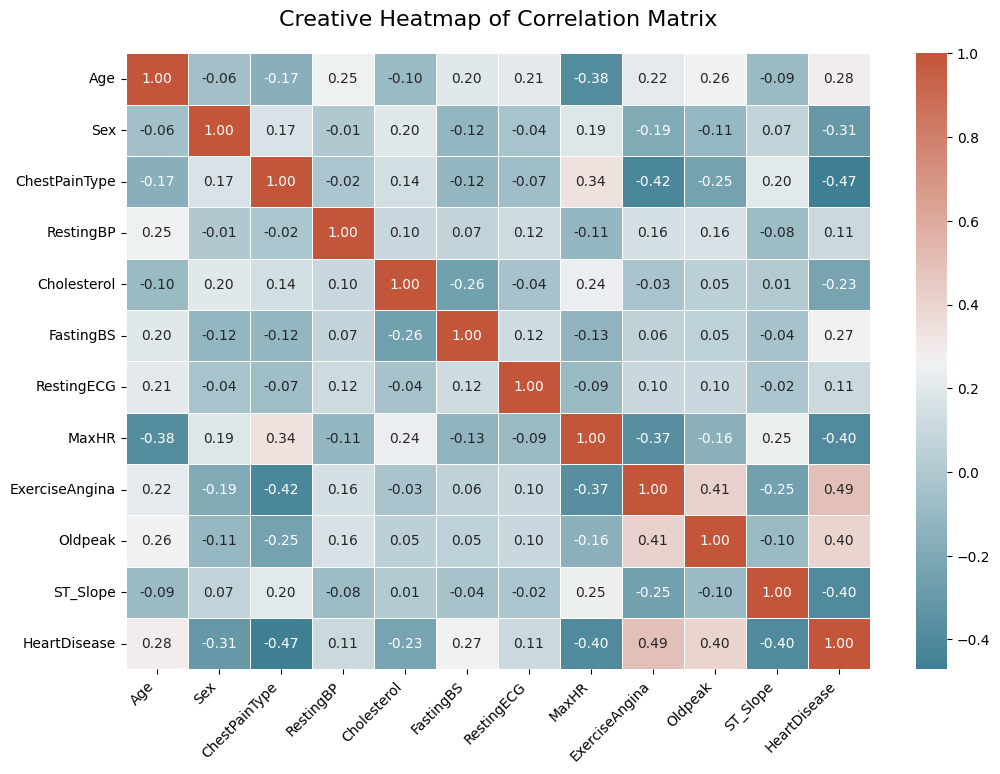

In [9]:

correlation_matrix = df.corr()
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=.5)
plt.title('Creative Heatmap of Correlation Matrix', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

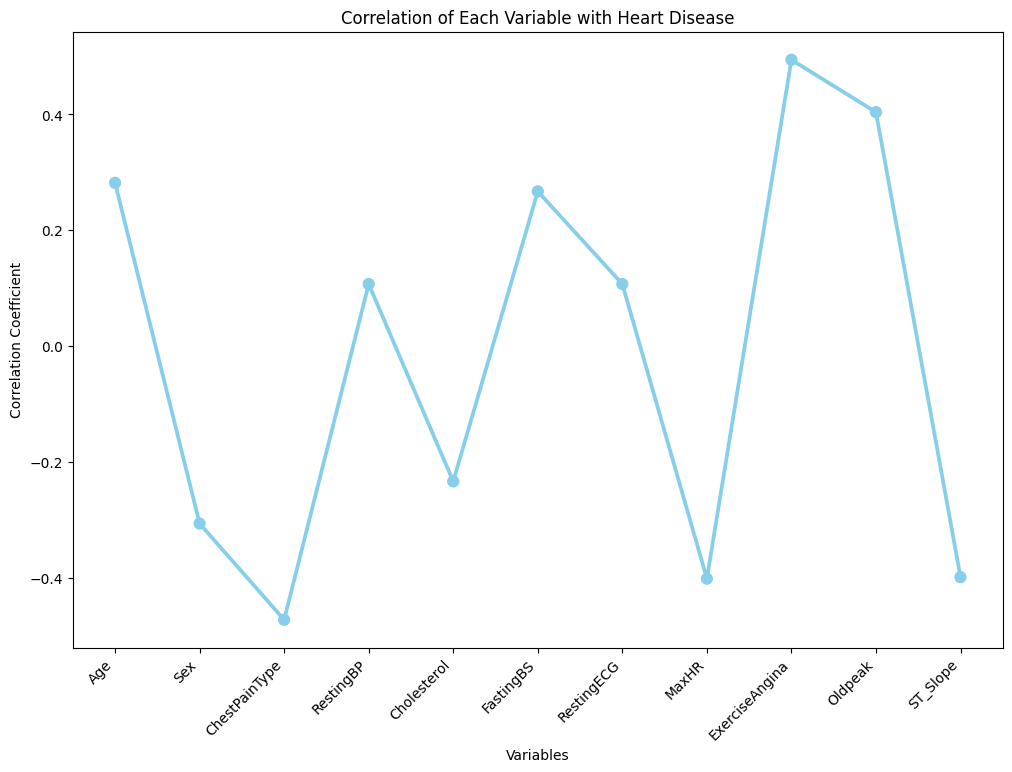

In [10]:
heart_disease_correlation = df.corr()['HeartDisease']
heart_disease_correlation = heart_disease_correlation.drop('HeartDisease')

plt.figure(figsize=(12, 8))
sns.pointplot(x=heart_disease_correlation.index, y=heart_disease_correlation.values, color='skyblue')
plt.title('Correlation of Each Variable with Heart Disease')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.show()

In [11]:
#check outlier
num = sorted(list(set(df)))
for col in num:
    tmp_df = df[(df[col] > df[col].mean() + df[col].std() * 3 ) |
    (df[col] < df[col].mean() - df[col].std() * 3 )]
    print(col, len(tmp_df))

Age 0
ChestPainType 0
Cholesterol 3
ExerciseAngina 0
FastingBS 0
HeartDisease 0
MaxHR 1
Oldpeak 7
RestingBP 8
RestingECG 0
ST_Slope 0
Sex 0


In [12]:
#remove outlier
for col in df.columns:
    # Calculate mean and standard deviation
    mean = df[col].mean()
    std = df[col].std()

    # Filter the DataFrame to keep only values within 3 standard deviations from the mean
    df = df[(df[col] <= mean + 3 * std) & (df[col] >= mean - 3 * std)]

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [15]:
!pip install lazypredict

In [16]:
from lazypredict.Supervised import LazyClassifier

lazy_model = LazyClassifier(verbose=1)
models, predictions = lazy_model.fit(X_train, X_val, y_train, y_val)

 14%|█▍        | 4/29 [00:00<00:02, 12.20it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.85, 'Balanced Accuracy': 0.8502964426877471, 'ROC AUC': 0.850296442687747, 'F1 Score': 0.8500138893175716, 'Time taken': 0.158050537109375}
{'Model': 'BaggingClassifier', 'Accuracy': 0.8222222222222222, 'Balanced Accuracy': 0.8211462450592886, 'ROC AUC': 0.8211462450592885, 'F1 Score': 0.8216931216931217, 'Time taken': 0.05021238327026367}
{'Model': 'BernoulliNB', 'Accuracy': 0.8388888888888889, 'Balanced Accuracy': 0.8391798418972332, 'ROC AUC': 0.8391798418972333, 'F1 Score': 0.838903807044799, 'Time taken': 0.016432762145996094}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.8666666666666667, 'Balanced Accuracy': 0.8668478260869565, 'ROC AUC': 0.8668478260869565, 'F1 Score': 0.8666831296044778, 'Time taken': 0.12322473526000977}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.7722222222222223, 'Balanced Accuracy': 0.7722332015810276, 'ROC AUC': 0.7722332015810277, 'F1 Score': 0.7722433186173115, 'Time taken': 0.0166778564453125}
{'M

 41%|████▏     | 12/29 [00:00<00:01, 14.86it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.8777777777777778, 'Balanced Accuracy': 0.8777173913043479, 'ROC AUC': 0.8777173913043479, 'F1 Score': 0.8777777777777778, 'Time taken': 0.2828073501586914}
{'Model': 'GaussianNB', 'Accuracy': 0.85, 'Balanced Accuracy': 0.8500494071146245, 'ROC AUC': 0.8500494071146245, 'F1 Score': 0.8500138927479854, 'Time taken': 0.020700931549072266}
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.8833333333333333, 'Balanced Accuracy': 0.883399209486166, 'ROC AUC': 0.883399209486166, 'F1 Score': 0.8833441388039887, 'Time taken': 0.04373455047607422}
{'Model': 'LabelPropagation', 'Accuracy': 0.8444444444444444, 'Balanced Accuracy': 0.8448616600790514, 'ROC AUC': 0.8448616600790515, 'F1 Score': 0.8444444444444444, 'Time taken': 0.08079838752746582}


 59%|█████▊    | 17/29 [00:01<00:00, 15.81it/s]

{'Model': 'LabelSpreading', 'Accuracy': 0.8444444444444444, 'Balanced Accuracy': 0.8448616600790514, 'ROC AUC': 0.8448616600790515, 'F1 Score': 0.8444444444444444, 'Time taken': 0.13815617561340332}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.8666666666666667, 'Balanced Accuracy': 0.8668478260869565, 'ROC AUC': 0.8668478260869565, 'F1 Score': 0.8666831296044778, 'Time taken': 0.062044382095336914}
{'Model': 'LinearSVC', 'Accuracy': 0.8666666666666667, 'Balanced Accuracy': 0.8668478260869565, 'ROC AUC': 0.8668478260869565, 'F1 Score': 0.8666831296044778, 'Time taken': 0.05592942237854004}
{'Model': 'LogisticRegression', 'Accuracy': 0.8666666666666667, 'Balanced Accuracy': 0.8668478260869565, 'ROC AUC': 0.8668478260869565, 'F1 Score': 0.8666831296044778, 'Time taken': 0.03272581100463867}
{'Model': 'NearestCentroid', 'Accuracy': 0.8333333333333334, 'Balanced Accuracy': 0.8339920948616601, 'ROC AUC': 0.83399209486166, 'F1 Score': 0.8332715973165411, 'Time taken': 0.0214524269104

 69%|██████▉   | 20/29 [00:01<00:00, 18.26it/s]

{'Model': 'NuSVC', 'Accuracy': 0.8722222222222222, 'Balanced Accuracy': 0.8712944664031621, 'ROC AUC': 0.8712944664031621, 'F1 Score': 0.8719174144868869, 'Time taken': 0.06580758094787598}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.7833333333333333, 'Balanced Accuracy': 0.7828557312252964, 'ROC AUC': 0.7828557312252965, 'F1 Score': 0.7831926885310089, 'Time taken': 0.022474288940429688}
{'Model': 'Perceptron', 'Accuracy': 0.8388888888888889, 'Balanced Accuracy': 0.8389328063241107, 'ROC AUC': 0.8389328063241107, 'F1 Score': 0.8389038107293177, 'Time taken': 0.020687103271484375}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.8555555555555555, 'Balanced Accuracy': 0.8552371541501976, 'ROC AUC': 0.8552371541501976, 'F1 Score': 0.8555019981048902, 'Time taken': 0.03822040557861328}


 86%|████████▌ | 25/29 [00:02<00:00,  8.71it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.8722222222222222, 'Balanced Accuracy': 0.8710474308300395, 'ROC AUC': 0.8710474308300393, 'F1 Score': 0.8717583830611662, 'Time taken': 0.7488100528717041}
{'Model': 'RidgeClassifier', 'Accuracy': 0.8666666666666667, 'Balanced Accuracy': 0.8668478260869565, 'ROC AUC': 0.8668478260869565, 'F1 Score': 0.8666831296044778, 'Time taken': 0.06792831420898438}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.8666666666666667, 'Balanced Accuracy': 0.8668478260869565, 'ROC AUC': 0.8668478260869565, 'F1 Score': 0.8666831296044778, 'Time taken': 0.052887678146362305}
{'Model': 'SGDClassifier', 'Accuracy': 0.8388888888888889, 'Balanced Accuracy': 0.838191699604743, 'ROC AUC': 0.838191699604743, 'F1 Score': 0.8386645626411707, 'Time taken': 0.04644632339477539}


 93%|█████████▎| 27/29 [00:02<00:00,  9.88it/s]

{'Model': 'SVC', 'Accuracy': 0.8722222222222222, 'Balanced Accuracy': 0.8712944664031621, 'ROC AUC': 0.8712944664031621, 'F1 Score': 0.8719174144868869, 'Time taken': 0.11123466491699219}
{'Model': 'XGBClassifier', 'Accuracy': 0.85, 'Balanced Accuracy': 0.8500494071146245, 'ROC AUC': 0.8500494071146245, 'F1 Score': 0.8500138927479854, 'Time taken': 1.3788034915924072}
[LightGBM] [Info] Number of positive: 400, number of negative: 319
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 369
[LightGBM] [Info] Number of data points in the train set: 719, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.556328 -> initscore=0.226273
[LightGBM] [Info] Start training from score 0.226273
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

100%|██████████| 29/29 [00:04<00:00,  7.02it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [17]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.88               0.88     0.88      0.88   
KNeighborsClassifier               0.88               0.88     0.88      0.88   
ExtraTreesClassifier               0.88               0.88     0.88      0.88   
SVC                                0.87               0.87     0.87      0.87   
NuSVC                              0.87               0.87     0.87      0.87   
RandomForestClassifier             0.87               0.87     0.87      0.87   
LinearDiscriminantAnalysis         0.87               0.87     0.87      0.87   
RidgeClassifierCV                  0.87               0.87     0.87      0.87   
RidgeClassifier                    0.87               0.87     0.87      0.87   
LogisticRegression                 0.87               0.87     0.87      0.87   
LinearSVC                   

In [18]:
top_5_models = models.sort_values(by='Accuracy', ascending=False).head(5)
top_5_model_info = [(model, accuracy) for model, accuracy in zip(top_5_models.index, top_5_models['Accuracy'])]
top_5_model_names = [model for model, accuracy in top_5_model_info]

print("Top 5 models with Accuracy:")
for model, accuracy in top_5_model_info:
    print(f"{model}: {accuracy}")

Top 5 models with Accuracy:
LGBMClassifier: 0.8833333333333333
KNeighborsClassifier: 0.8833333333333333
ExtraTreesClassifier: 0.8777777777777778
SVC: 0.8722222222222222
NuSVC: 0.8722222222222222
